In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = r"C:\Users\LENOVO\Cohort-3.0-Machine-Learning-Assignments\data\US-pumpkins.csv"
df = pd.read_csv(path)


# Display the first few rows of the DataFrame
print(df.head())

# Display the data types of each column
print(df.dtypes)

print(df.shape)
print(df.columns)
df.head()

   City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0     

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


### Clean the Dataset

In [21]:
# Drop unnamed columns
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

# Drop rows with all NaNs in important columns
df = df.dropna(subset=['Variety', 'Low Price', 'High Price'], how='all')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# Fix Price columns
price_cols = ['Low Price', 'High Price', 'Mostly Low', 'Mostly High']
df[price_cols] = df[price_cols].apply(pd.to_numeric, errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City Name        1757 non-null   object        
 1   Type             45 non-null     object        
 2   Package          1757 non-null   object        
 3   Variety          1752 non-null   object        
 4   Sub Variety      296 non-null    object        
 5   Grade            0 non-null      float64       
 6   Date             1757 non-null   datetime64[ns]
 7   Low Price        1757 non-null   float64       
 8   High Price       1757 non-null   float64       
 9   Mostly Low       1654 non-null   float64       
 10  Mostly High      1654 non-null   float64       
 11  Origin           1754 non-null   object        
 12  Origin District  131 non-null    object        
 13  Item Size        1478 non-null   object        
 14  Color            1141 non-null   object 

### Feature Engineering

In [29]:
# Calculate average price

df['Average Price'] = df[['Low Price', 'High Price']].mean(axis=1)

# Extract month and year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Describe the DataFrame
print(df.describe())

       Grade                           Date    Low Price   High Price  \
count    0.0                           1757  1757.000000  1757.000000   
mean     NaN  2017-01-05 09:18:57.165623296   124.571338   132.970939   
min      NaN            2014-11-29 00:00:00     0.240000     0.240000   
25%      NaN            2016-10-08 00:00:00    24.000000    24.500000   
50%      NaN            2016-10-22 00:00:00   140.000000   150.000000   
75%      NaN            2017-01-28 00:00:00   180.000000   200.000000   
max      NaN            2017-09-30 00:00:00   480.000000   480.000000   
std      NaN                            NaN    83.876591    89.524958   

        Mostly Low  Mostly High  Environment  Quality  Condition  Appearance  \
count  1654.000000  1654.000000          0.0      0.0        0.0         0.0   
mean    128.170550   132.491802          NaN      NaN        NaN         NaN   
min       0.240000     0.240000          NaN      NaN        NaN         NaN   
25%      24.625000    

,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Environment,Quality,Condition,Appearance,Storage,Crop,Trans Mode,Average Price,Year
count,0.0,1757,1757.000000,1757.000000,1654.000000,1654.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1757.000000,1757.000000
mean,NaN,2017-01-05 09:18:57.165623296,124.571338,132.970939,128.170550,132.491802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.771138,2016.249858
min,NaN,2014-11-29 00:00:00,0.240000,0.240000,0.240000,0.240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240000,2014.000000
25%,NaN,2016-10-08 00:00:00,24.000000,24.500000,24.625000,26.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.250000,2016.000000
50%,NaN,2016-10-22 00:00:00,140.000000,150.000000,147.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000000,2016.000000
75%,NaN,2017-01-28 00:00:00,180.000000,200.000000,185.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.500000,2017.000000
max,NaN,2017-09-30 00:00:00,480.000000,480.000000,480.000000,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.000000,2017.000000
std,NaN,NaN,83.876591,89.524958,86.512161,88.442967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.426495,0.444732


### Checking the Missing Values

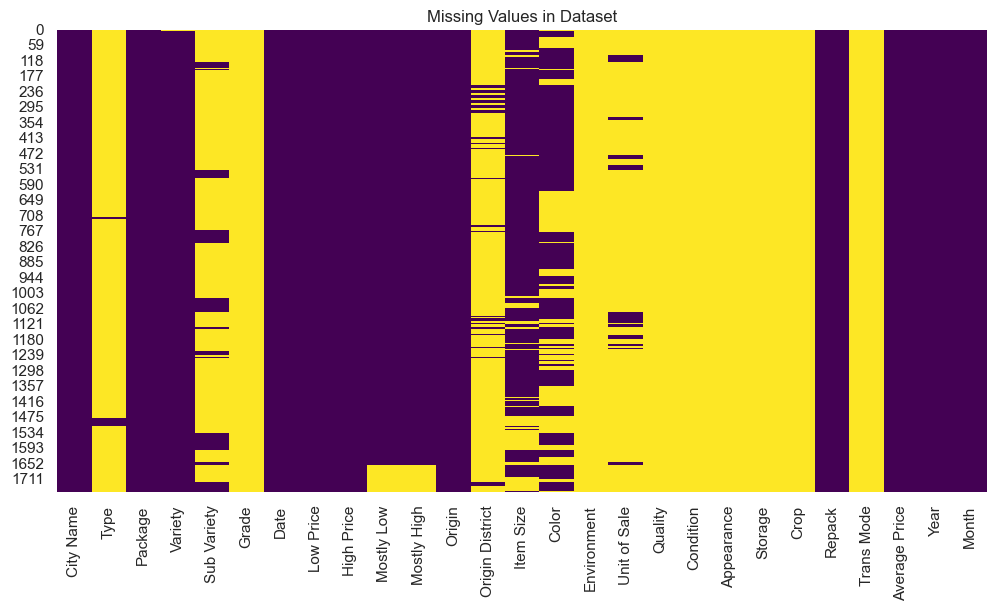

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()

### Visualization

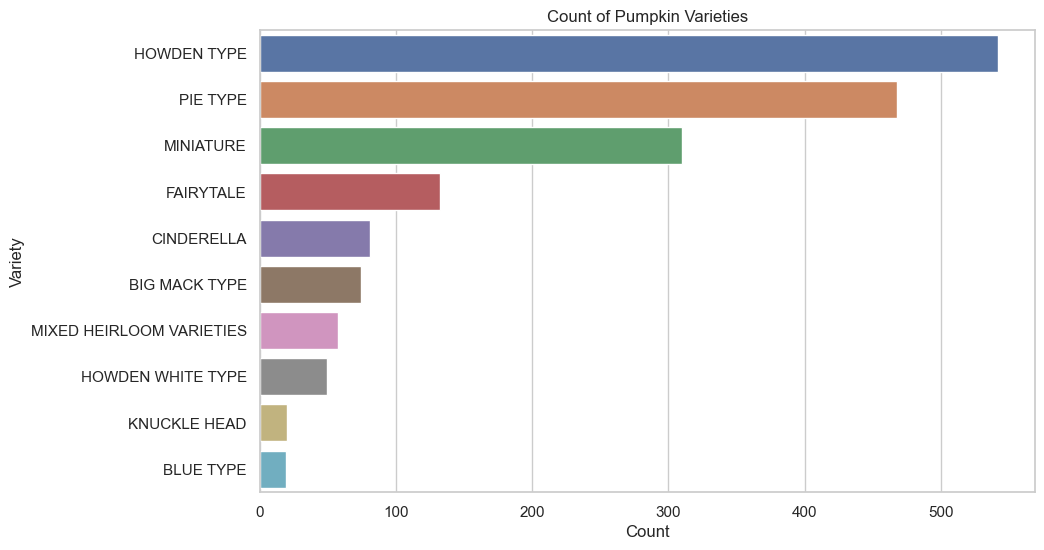

In [ ]:
# Pumpkin Varieties
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Variety', order=df['Variety'].value_counts().index)
plt.title('Count of Pumpkin Varieties')
plt.xlabel('Count')
plt.ylabel('Variety')
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14756\2206182348.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Average Price', y='Variety', estimator='mean', ci=None)


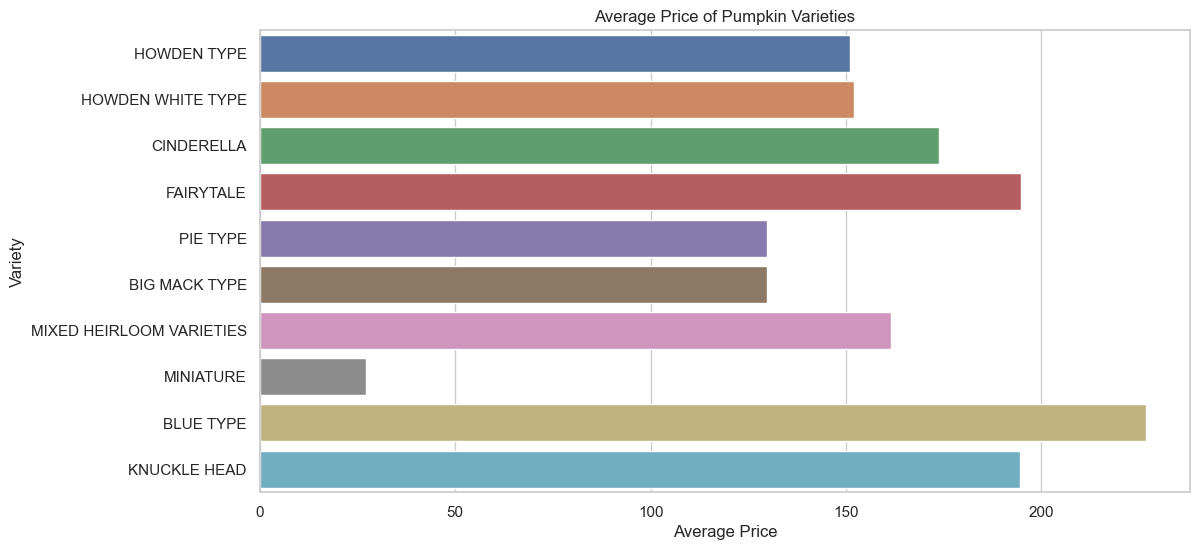

In [32]:
# Average Price of Pumpkins Varieties
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Average Price', y='Variety', estimator='mean', ci=None)
plt.title('Average Price of Pumpkin Varieties')
plt.xlabel('Average Price')
plt.ylabel('Variety')
plt.show()

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


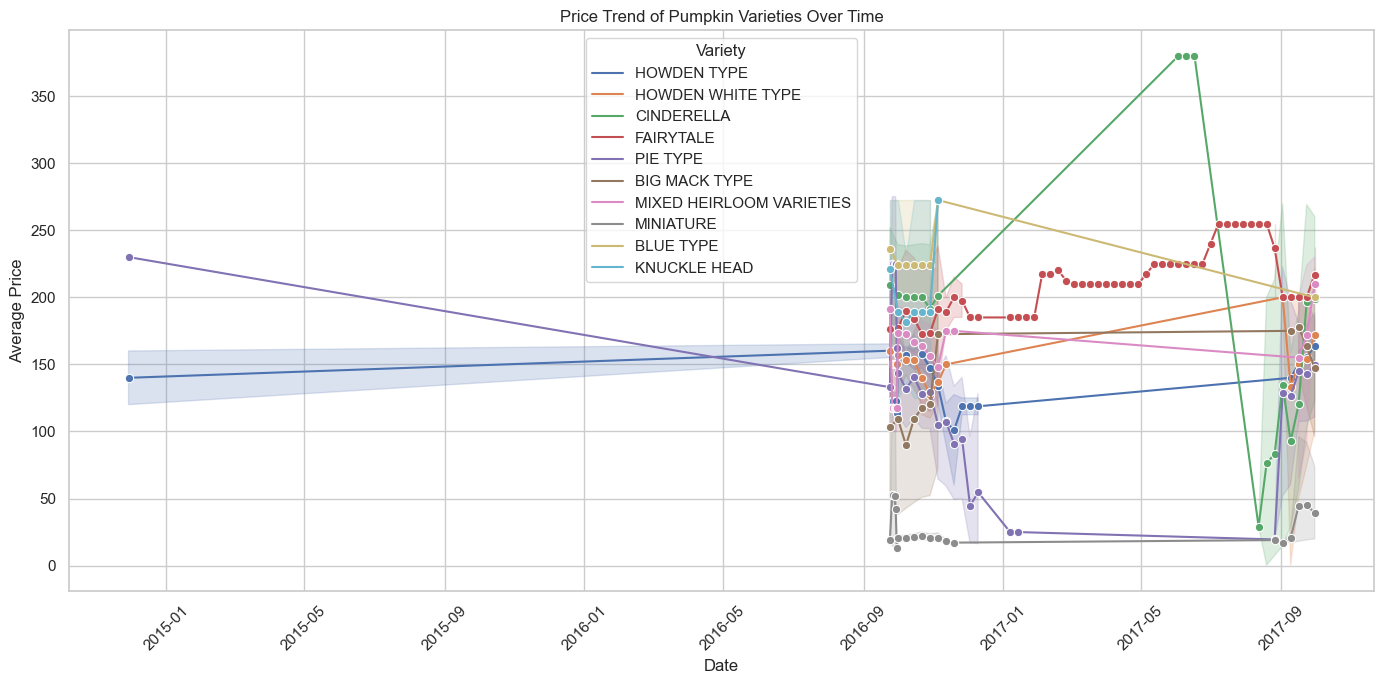

In [33]:
# Price Trend Over Time (Line Plot)
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='Date', y='Average Price', hue='Variety', marker='o')
plt.title('Price Trend of Pumpkin Varieties Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Variety')
plt.tight_layout()
plt.show() 

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


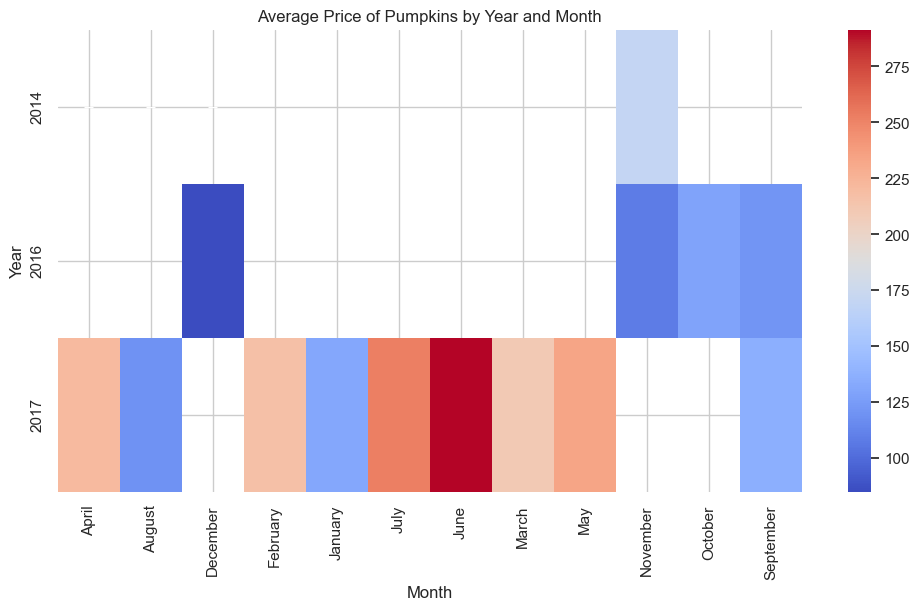

In [34]:
# Heatmap of average price by year and month
plt.figure(figsize=(12,6))
avg_price_by_month = df.groupby(['Year', 'Month'])['Average Price'].mean().unstack()
sns.heatmap(avg_price_by_month, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average Price of Pumpkins by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

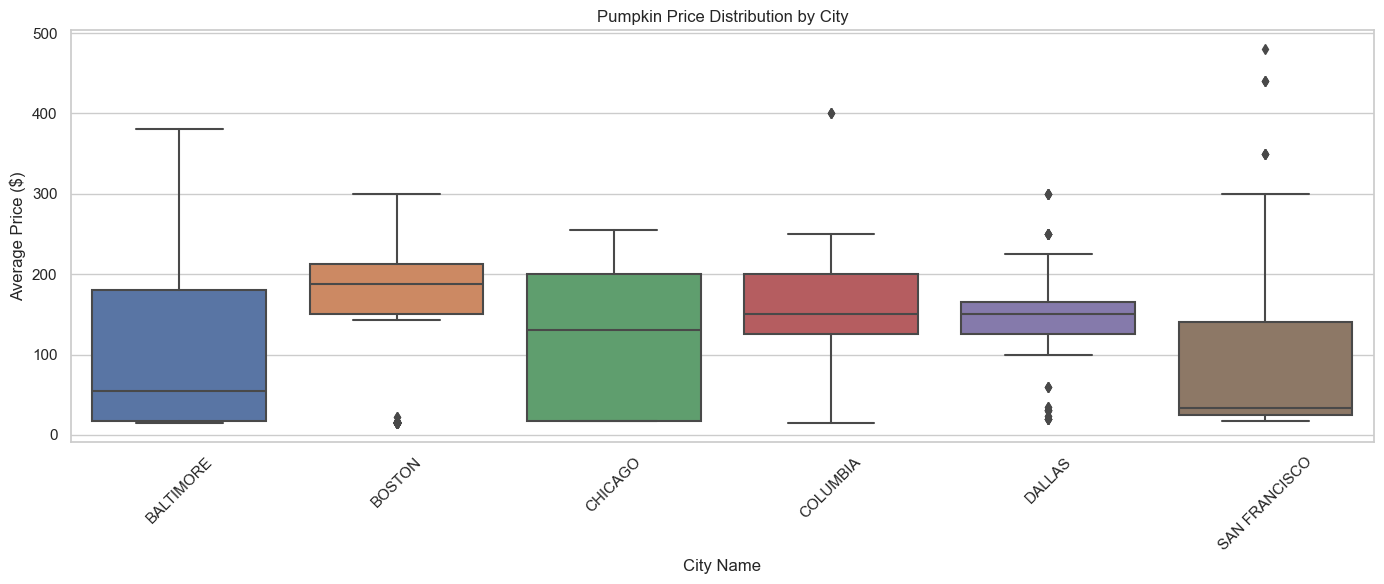

In [ ]:
# Boxplot Cities Price Distribution
sns.set(style="whitegrid")
top_cities = df['City Name'].value_counts().index[:6]
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['City Name'].isin(top_cities)], x='City Name', y='Average Price')
plt.title("Pumpkin Price Distribution by City")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
